In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten  # Dropout regularization : to get rid of overfitting problem
# Dense : output layer and pooling layer
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [4]:
num_classes=10
batch_size=64
epochs = 24

In [6]:
# input image dimensions
img_rows, img_cols= 28,28

In [30]:
# the data, shhuffled and split between train and test set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
len(y_train)

60000

In [34]:
y_train

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [35]:
x_train = x_train.reshape(x_train.shape[0] , img_rows, img_cols, 1)
x_test= x_test. reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape= (img_rows, img_cols ,1)

In [36]:
input_shape

(28, 28, 1)

In [37]:
x_train.shape

(60000, 28, 28, 1)

In [38]:
# Type convert and scale the test and training data
x_train =x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /=255.
x_test /=255.
print('x_train shape:', x_train.shape)
print('x_test shape: ' , x_test.shape)
print(y_train[0:3])

x_train shape: (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
[9 0 0]


In [39]:
# convert class vectors to binary class matrices. One HOt encoding
# 3=> 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tf.keras.utils.to_categorical(y_train,  num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# CNN Code begins

In [40]:
# Defin model
model= Sequential()

In [41]:
num_classes

10

In [42]:
# creata a CNN to classify the images
model.add(Conv2D(32 , kernel_size= (3,3), activation="relu", 
                 input_shape=input_shape))
# Convolution step ( input, feature detector )
model.add(MaxPooling2D(pool_size=(2,2)))
# Pooling step
model.add(Conv2D(32 , kernel_size= (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [44]:
# define compile to minimize categorical loss, use ada delta optimied, and optimize
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adam(),
             metrics=['accuracy'])
# Train the model and test/validate the mode with the test data afetr each cycle(epoch) through thhe training data
# Return history of loss and accuracy for each epoch
hist= model.fit(x_train,y_train,
                batch_size =64,
                epochs = 24,
                verbose=1,
                validation_data = (x_test,y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.8059 - loss: 0.5318 - val_accuracy: 0.8569 - val_loss: 0.4018
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8735 - loss: 0.3449 - val_accuracy: 0.8789 - val_loss: 0.3373
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8917 - loss: 0.2937 - val_accuracy: 0.8866 - val_loss: 0.3059
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9014 - loss: 0.2640 - val_accuracy: 0.8925 - val_loss: 0.2977
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9109 - loss: 0.2381 - val_accuracy: 0.9032 - val_loss: 0.2718
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9177 - loss: 0.2195 - val_accuracy: 0.9072 - val_loss: 0.2620
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9246 - loss: 0.2020 - val_accuracy: 0.9002 - val_loss: 0.2725
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9296 - loss: 0.1863 - 

Test loss: 0.4670657217502594
Test accuracy: 0.9075000286102295


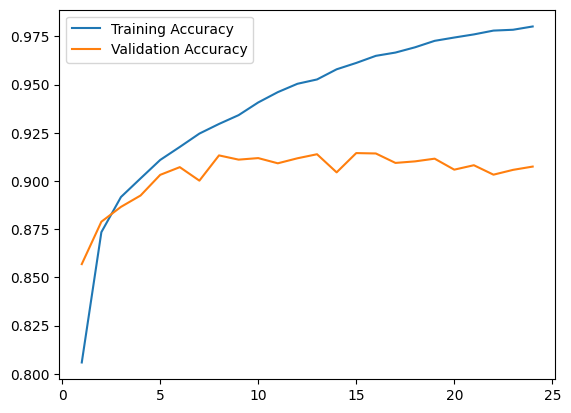

In [45]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

In [ ]:
Parameters in a Conv layer:
((shape of width of filter x shape of height filter x number of filters in the previous layer+1) * number of filters)
Parameters in the FC layer
((current layer c * previous layer p)+1*c)